![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

<h1 style="color: #00BFFF;">00 |</h1>

- Import the required libraries and modules that you would need.

In [1]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import warnings # warning messages management

# 🤖 Machine Learning
from sklearn.preprocessing import MinMaxScaler # data scaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay # roc curve, confussion matrix & displayer

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
# 🔧 Basic functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

- Read that data into Python and call the dataframe `churnData`.

In [4]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head(5) # call of the churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


<h1 style="color: #00BFFF;">02 | EDA</h1>

- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [5]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

<h1 style="color: #00BFFF;">03 | Data Cleaning</h1>

- Check for null values in the dataframe. Replace the null values.

In [7]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
churnData.duplicated().sum()

49

In [9]:
# Let's drop the duplicates
churnData = churnData.drop_duplicates()

In [10]:
churnData.duplicated().sum()

0

In [11]:
# So... apart from nulls, duplicates, what else we can check?
churnData.eq(' ').sum() # empty spaces ofc, eq = an empty space & sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Muahahaha, there are ofc some empty spaces we are not gonna miss

In [13]:
churnData['TotalCharges'] = churnData['TotalCharges'].replace(' ', np.nan)  # replacing it with NaN 
churnData = churnData.dropna(subset=['TotalCharges']) # and dropping them like NaN

In [14]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h1 style="color: #00BFFF;">04 | Data Pre-Processing</h1>

- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:

In [15]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']] # Selecting the features from the lab
y = churnData['Churn'] # Is our customer churn or not?

  - Scale the features either by using normalizer or a standard scaler.

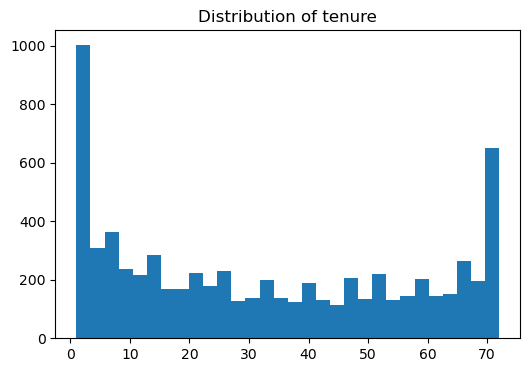

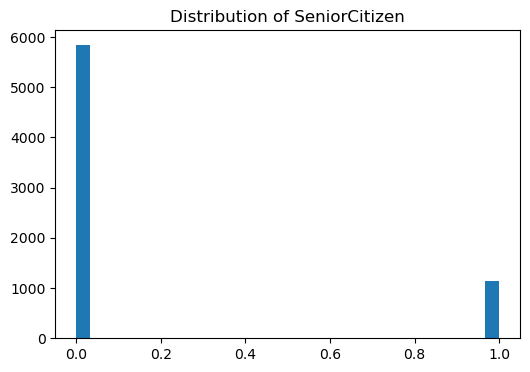

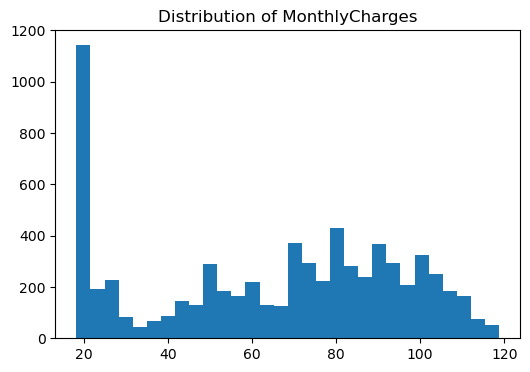

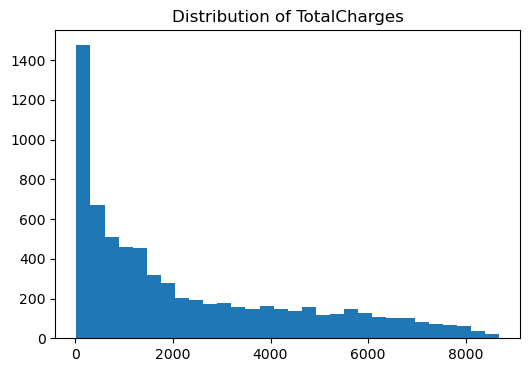

In [16]:
# Checking the distributions to select our scaler
for feature in X:
    plt.figure(figsize=(6, 4))
    plt.hist(churnData[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [17]:
# StandardScaler dosen't make any sense, since it's not normal distributed.
# We will use minmax, even to seniorcitizen (it will not affect the model)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

-  Split the data into a training set and a test set.

<h1 style="color: #00BFFF;">05 | Modeling</h1>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [19]:
model = LogisticRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

LogisticRegression()

  - Check the accuracy on the test data.

In [20]:
predictions = model.predict(X_test)

<h1 style="color: #00BFFF;">06 | Reporting</h1>

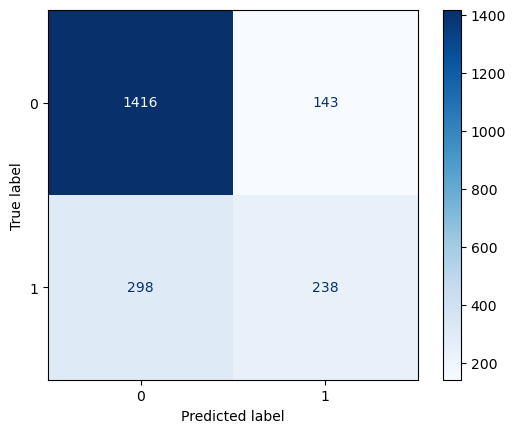


              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1559
         Yes       0.62      0.44      0.52       536

    accuracy                           0.79      2095
   macro avg       0.73      0.68      0.69      2095
weighted avg       0.77      0.79      0.78      2095



In [21]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print("")
print(classification_report(y_test, predictions))

<h1 style="color: #00BFFF;">07 | Еще раз !</h1>

<h3 style="color: #008080;">Improving it's an iteration process</h3>

**Note**: So far we have not balanced the data.

In [22]:
# The model has a precision for true positives of "No" of 83%
# And a precision for true positives of "Yes" of 62%

# Let's improve the "Yeses"

<h3 style="color: #008080;">Fine-tunning the Model</h3>

Managing imbalance in the dataset

- Check for the imbalance. ✅
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes. ✅
- Each time fit the model and see how the accuracy of the model is. ✅

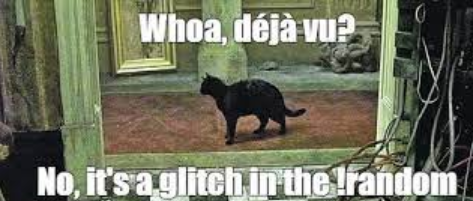

In [23]:
# Disclaimer, the following it´s an adaptation of the processes followed in a previous lab:

<h3 style="color: #008080;">Imbalance Manually</h3>

In [24]:
yes = churnData[churnData['Churn']=='Yes'] # We select from churnData;'Yeys' value from 'Churn' column in churnData
no = churnData[churnData['Churn']=='No'] # And the Nays ;)

In [25]:
len(yes) # How many yes do we have

1850

In [26]:
yes = yes.sample(500) # We take a sample of 500 yes

In [27]:
data2 = pd.concat([yes,no], axis=0) # We merge the two dataframes with concat

In [28]:
data2['Churn'].value_counts() # Now we have:

No     5133
Yes     500
Name: Churn, dtype: int64

In [29]:
churnData['Churn'].value_counts() # And before:

No     5133
Yes    1850
Name: Churn, dtype: int64

In [30]:
# Mixing the Data
data2 = data2.sample(frac=1) # Frac = How many data we want to mix 1=100%, 0.5=50%, so on...

In [31]:
Y = data2['Churn']
X = data2.select_dtypes(include=[np.number]) # Selecting Numericals

In [32]:
yes = churnData[churnData['Churn']=='Yes'].sample(5174, replace=True) # Replace "True" to duplicate data, 5174 to fill it with the same number of Nays and Yeys
no = churnData[churnData['Churn']=='No']
data3 = pd.concat([yes,no], axis=0)
data3 = data3.sample(frac=1)
data3['Churn'].value_counts()

Yes    5174
No     5133
Name: Churn, dtype: int64

In [33]:
# Normalazing the data
transformer = StandardScaler().fit(X)

In [34]:
# Transformation
X = transformer.transform(X)

In [35]:
# We define train and test for X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [37]:
# Predictions
predictions = logistic.predict(X_test)

confusion_matrix(Y_test, predictions)

logistic.score(X_test, Y_test)

logistic_2 = classification_report(Y_test, predictions) # Manually increasing imbalance
print(logistic_2)

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      1550
         Yes       0.80      0.03      0.06       140

    accuracy                           0.92      1690
   macro avg       0.86      0.51      0.51      1690
weighted avg       0.91      0.92      0.88      1690



<h3 style="color: #008080;">RandomUnderSampler</h3>

In [38]:
from imblearn.under_sampling import RandomUnderSampler # Random undersampling technique

In [39]:
rus = RandomUnderSampler()

In [40]:
y = churnData['Churn']
X = churnData.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [41]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# Using RandomUnderSampler
X_rus, y_rus = rus.fit_resample(X, y)
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, y_rus, test_size=0.3, random_state=100)

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [42]:
y.value_counts()

No     5133
Yes    1850
Name: Churn, dtype: int64

In [43]:
y_rus.value_counts()

No     1850
Yes    1850
Name: Churn, dtype: int64

In [44]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

logistic.score(X_test, y_test)

0.7279279279279279

In [45]:
logistic_3 = classification_report(y_test, predictions)
print(logistic_3)

              precision    recall  f1-score   support

          No       0.74      0.72      0.73       566
         Yes       0.72      0.73      0.73       544

    accuracy                           0.73      1110
   macro avg       0.73      0.73      0.73      1110
weighted avg       0.73      0.73      0.73      1110



<h3 style="color: #008080;">RandomOverSampler</h3>

In [46]:
from imblearn.over_sampling import RandomOverSampler # Random oversampling technique

In [47]:
# Selecting our library
ros = RandomOverSampler()

In [48]:
y = churnData['Churn']
X = churnData.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [49]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# Using RandomUnderSampler
X_ros, y_ros = ros.fit_resample(X, y)
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [50]:
y.value_counts()

No     5133
Yes    1850
Name: Churn, dtype: int64

In [51]:
y_ros.value_counts()

No     5133
Yes    5133
Name: Churn, dtype: int64

In [52]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

logistic.score(X_test, y_test)

0.7363636363636363

In [53]:
logistic_4 = classification_report(y_test, predictions)
print(logistic_4) # RandomOverSampler

              precision    recall  f1-score   support

          No       0.75      0.73      0.74      1564
         Yes       0.73      0.75      0.74      1516

    accuracy                           0.74      3080
   macro avg       0.74      0.74      0.74      3080
weighted avg       0.74      0.74      0.74      3080



<h3 style="color: #008080;">SMOTE</h3>

In [54]:
from imblearn.over_sampling import SMOTE # Oversampling librarie technique

In [55]:
# Selecting our library
smote = SMOTE()

In [56]:
y = churnData['Churn']
X = churnData.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [57]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# Using RandomUnderSampler
X_sm, y_sm = smote.fit_resample(X, y)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [58]:
y.value_counts()

No     5133
Yes    1850
Name: Churn, dtype: int64

In [59]:
y_sm.value_counts()

No     5133
Yes    5133
Name: Churn, dtype: int64

In [60]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

logistic.score(X_test, y_test)

0.7366883116883117

In [61]:
logistic_5 = classification_report(y_test, predictions)
print(logistic_5)

              precision    recall  f1-score   support

          No       0.75      0.72      0.74      1564
         Yes       0.72      0.75      0.74      1516

    accuracy                           0.74      3080
   macro avg       0.74      0.74      0.74      3080
weighted avg       0.74      0.74      0.74      3080



<h3 style="color: #008080;">TomeLinks</h3>

In [62]:
from imblearn.under_sampling import TomekLinks # Undersampling librarie technique

In [63]:
# Selecting our library
tl = TomekLinks(sampling_strategy='majority')

In [64]:
y = churnData['Churn']
X = churnData.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [65]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# Using RandomUnderSampler
X_tl, y_tl = tl.fit_resample(X, y)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [66]:
y.value_counts()

No     5133
Yes    1850
Name: Churn, dtype: int64

In [67]:
y_tl.value_counts()

No     4623
Yes    1850
Name: Churn, dtype: int64

In [68]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

logistic.score(X_test, y_test)

0.7914521112255407

In [69]:
logistic_6 = classification_report(y_test, predictions)
print(logistic_6)

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1397
         Yes       0.66      0.53      0.59       545

    accuracy                           0.79      1942
   macro avg       0.75      0.71      0.72      1942
weighted avg       0.78      0.79      0.78      1942



<h1 style="color: #00BFFF;">08 | Reporting</h1>

In [70]:
# I will shamelessly copy my past response:

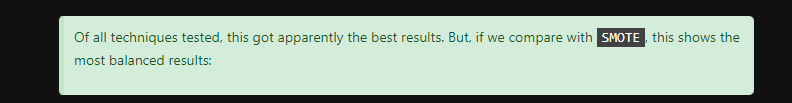

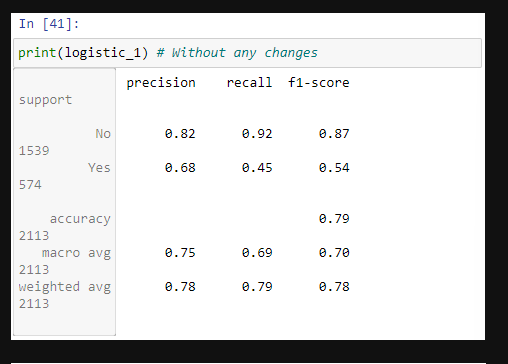

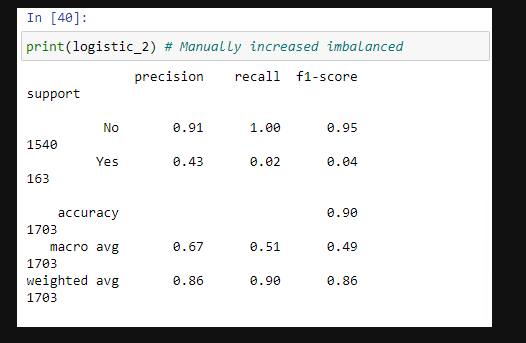

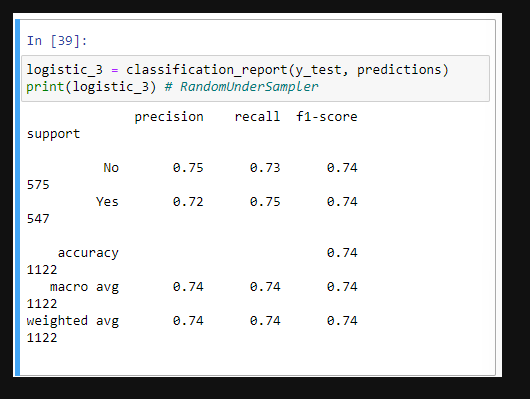

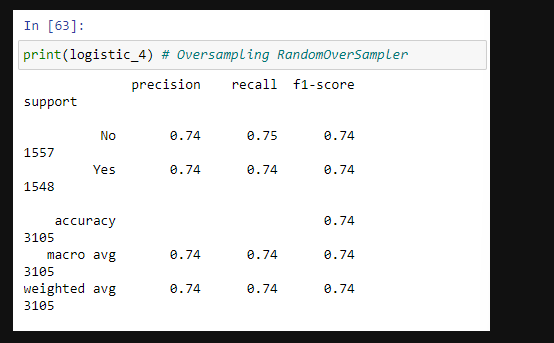

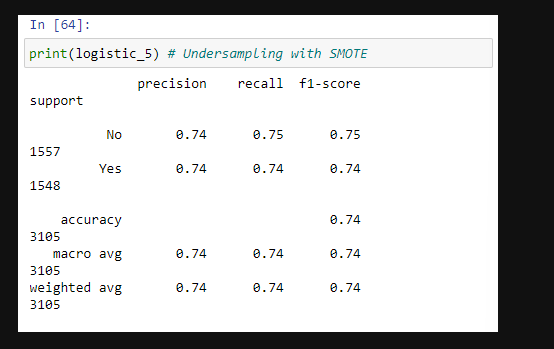

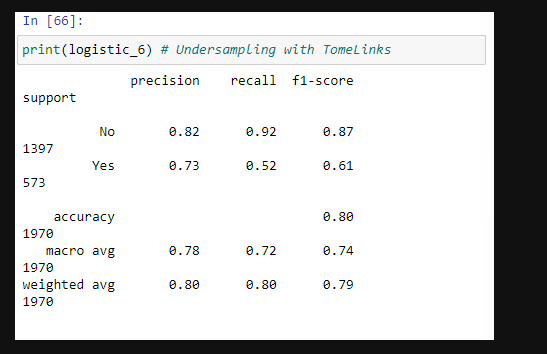